#### Listing 3.41 Loading the IMDB dataset

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


#### Listing 3.42 A look at the training data and labels

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

#### Listing 3.43 A look at the training data

In [4]:
max([max(sequence) for sequence in train_data])

9999

#### Listing 3.44 Decoding the integer sequences back into sentences

In [5]:
# word_index is a dictionary mapping words to an integer indice
word_index = imdb.get_word_index()

In [6]:
# we reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
# we decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Listing 3.45 Encoding the integer sequences into a binary matrix

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
        # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results


In [9]:
# our vectorized training data
x_train = vectorize_sequences(train_data)

In [10]:
# our vectorized test data
x_test = vectorize_sequences(test_data)

#### Listing 3.46 An encoded sample

In [11]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

#### Listing 3.47 Encoding the labels

In [12]:
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Listing 3.48 Our model definition

In [13]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Listing 3.49 Compiling our model

In [14]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

#### Listing 3.50 Configuring the optimizer

In [15]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

#### Listing 3.51 Using custom losses and metrics

In [16]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

##### Listing 3.52 Setting aside a validation set

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Listing 3.53 Training our model

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5157 - binary_accuracy: 0.7895 - val_loss: 0.4009 - val_binary_accuracy: 0.8653
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - binary_accuracy: 0.9029 - val_loss: 0.3247 - val_binary_accuracy: 0.8787
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2319 - binary_accuracy: 0.9246 - val_loss: 0.2808 - val_binary_accuracy: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - binary_accuracy: 0.9430 - val_loss: 0.2729 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1495 - binary_accuracy: 0.9513 - val_loss: 0.2780 - val_binary_accuracy: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1209 - binary_accuracy: 0.9631 - val_loss: 0.3221 - val_binary_accuracy: 0.88070.9
Epoch 7/20
15000/15000 [=================

#### Listing 3.54 The history dictionary

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

#### Listing 3.55 Plotting the training and validation loss

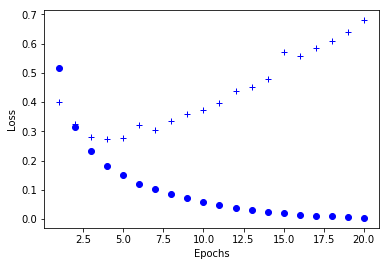

In [20]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')

# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

#### Listing 3.56 Plotting the training and validation accuracy

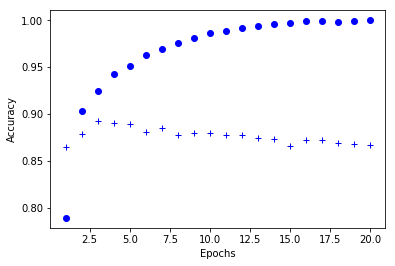

In [21]:
plt.clf() # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

#### Listing 3.57 Re-training a model from scratch

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 1s - loss: 0.2652 - acc: 0.9078     
Epoch 3/4
25000/25000 [==============================] - 1s - loss: 0.2022 - acc: 0.9278     
Epoch 4/4
24832/25000 [============================>.] - ETA: 0s

#### Listing 3.58 Our final results

In [23]:
results

[0.29110736083030703, 0.88507999999999998]